In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2023-08-28 10:50:44.243727: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-28 10:50:44.268235: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-28 10:50:44.681486: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
def create_lenet(input_shape):
    model = Sequential()
    model.add(tf.keras.layers.Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=input_shape))
    model.add(tf.keras.layers.AveragePooling2D((2,2),strides=2))
    model.add(tf.keras.layers.Conv2D(16, kernel_size=(5, 5), activation='tanh'))
    model.add(tf.keras.layers.AveragePooling2D((2,2),strides=2))
    model.add(Flatten())
    model.add(Dense(120, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    return model

In [3]:
def create_alexnet(input_shape):
    model = Sequential()
    model.add(tf.keras.layers.Conv2D(96, kernel_size=(11, 11), strides=4, padding='valid', activation='relu', input_shape=input_shape))
    model.add(tf.keras.layers.MaxPooling2D((3,3),strides=2,padding='valid'))
    model.add(tf.keras.layers.Conv2D(256, kernel_size=(5, 5), activation='relu',padding='same',strides=2))
    model.add(tf.keras.layers.MaxPooling2D((3,3),strides=2,padding='valid'))
    model.add(tf.keras.layers.Conv2D(384, kernel_size=(3, 3), activation='relu',padding='same',strides=1))
    model.add(tf.keras.layers.Conv2D(384, kernel_size=(3, 3), activation='relu',padding='same',strides=1))
    model.add(tf.keras.layers.Conv2D(384, kernel_size=(3, 3), activation='relu',padding='same',strides=1))
    model.add(tf.keras.layers.MaxPooling2D((3,3),strides=2,padding='valid'))

    model.add(Flatten())
    model.add(Dense(120, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    return model

In [4]:
train = tf.keras.utils.image_dataset_from_directory('cats/train')

Found 2000 files belonging to 2 classes.


2023-08-28 10:50:45.378403: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-28 10:50:45.393981: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-28 10:50:45.394125: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

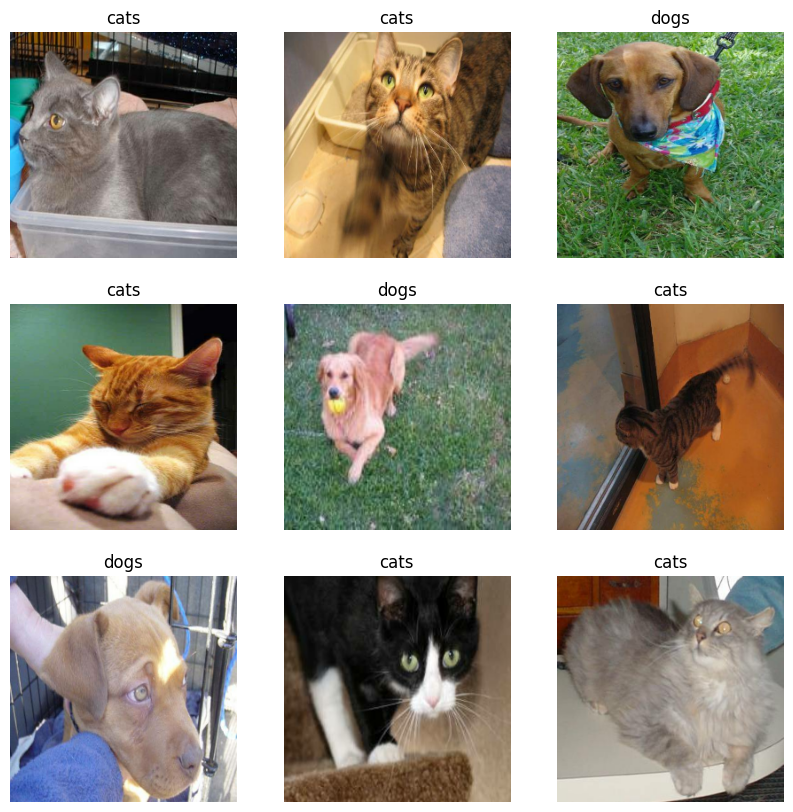

In [5]:
class_names = train.class_names
plt.figure(figsize=(10, 10))
len = 0
for images, labels in train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        len = images[i].shape
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [18]:
shape = tuple(len)
shape

(256, 256, 3)

In [7]:
lenet = create_lenet(shape)
lenet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 6)       456       
                                                                 
 average_pooling2d (Average  (None, 126, 126, 6)       0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 16)      2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 61, 61, 16)        0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 59536)             0         
                                                                 
 dense (Dense)               (None, 120)               7

In [8]:
alexnet = create_alexnet(shape)
alexnet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 96)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 15, 15, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 256)         0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 384)         885120    
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 384)        

In [9]:
lenet.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.BinaryCrossentropy(), metrics='accuracy')
alexnet.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.BinaryCrossentropy(), metrics='accuracy')

In [16]:
history = lenet.fit(train,epochs=20)

Epoch 1/20
63/63 [==============================] - 2s 25ms/step - loss: 2.1148e-04 - accuracy: 1.0000
Epoch 2/20
63/63 [==============================] - 2s 25ms/step - loss: 1.8499e-04 - accuracy: 1.0000
Epoch 3/20
63/63 [==============================] - 2s 25ms/step - loss: 1.6560e-04 - accuracy: 1.0000
Epoch 4/20
63/63 [==============================] - 2s 25ms/step - loss: 1.4850e-04 - accuracy: 1.0000
Epoch 5/20
63/63 [==============================] - 2s 25ms/step - loss: 1.3402e-04 - accuracy: 1.0000
Epoch 6/20
63/63 [==============================] - 2s 25ms/step - loss: 1.2058e-04 - accuracy: 1.0000
Epoch 7/20
63/63 [==============================] - 2s 25ms/step - loss: 1.1022e-04 - accuracy: 1.0000
Epoch 8/20
63/63 [==============================] - 2s 25ms/step - loss: 9.8599e-05 - accuracy: 1.0000
Epoch 9/20
63/63 [==============================] - 2s 25ms/step - loss: 9.0166e-05 - accuracy: 1.0000
Epoch 10/20
63/63 [==============================] - 2s 25ms/step - loss:

In [17]:
history2 = alexnet.fit(train,epochs=20)

Epoch 1/20
63/63 [==============================] - 2s 31ms/step - loss: 0.6653 - accuracy: 0.5890
Epoch 2/20
63/63 [==============================] - 2s 31ms/step - loss: 0.6309 - accuracy: 0.6430
Epoch 3/20
63/63 [==============================] - 2s 31ms/step - loss: 0.6138 - accuracy: 0.6555
Epoch 4/20
63/63 [==============================] - 2s 31ms/step - loss: 0.6172 - accuracy: 0.6505
Epoch 5/20
63/63 [==============================] - 2s 31ms/step - loss: 0.5844 - accuracy: 0.6945
Epoch 6/20
63/63 [==============================] - 2s 31ms/step - loss: 0.5785 - accuracy: 0.6860
Epoch 7/20
63/63 [==============================] - 2s 31ms/step - loss: 0.5433 - accuracy: 0.7260
Epoch 8/20
63/63 [==============================] - 2s 31ms/step - loss: 0.5044 - accuracy: 0.7540
Epoch 9/20
63/63 [==============================] - 2s 31ms/step - loss: 0.4922 - accuracy: 0.7565
Epoch 10/20
63/63 [==============================] - 2s 31ms/step - loss: 0.4586 - accuracy: 0.7790
Epoch 11/

In [13]:
test = tf.keras.utils.image_dataset_from_directory('cats/validation')

Found 1000 files belonging to 2 classes.


In [19]:
test_loss, test_acc = lenet.evaluate(test,verbose=2)
print(test_acc)
test_loss, test_acc = alexnet.evaluate(test,verbose=2)
print(test_acc)

32/32 - 0s - loss: 2.5750 - accuracy: 0.5650 - 447ms/epoch - 14ms/step
0.5649999976158142
32/32 - 0s - loss: 1.7277 - accuracy: 0.6300 - 477ms/epoch - 15ms/step
0.6299999952316284
